# NASA Space Apps Challenge 2023 

## OMNI Data  - (2004-08-26 : 2023-08-26)

### 1. Importing Data 

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [5]:
# Initialize an empty DataFrame to store the data
solar_data = pd.DataFrame()

# Loop through the years from 2004 to 2023
for year in range(2004, 2024):  # Note that range() excludes the end year (2024)
    # Construct the filename for the data file
    file_name = f'omni_min_{year}.lst'
    file_path = os.path.join(data_dir, file_name)
    
    #columns name for easy access
    common_header = ["YYYY","DOY","HR","MN"]
    headers =  ["Timeshift","Field magnitude average(nT)","Speed(km/s)","Proton Density(n/cc)","Temperature(K)","FlowPressure(nPa)"]

    #graph_label for headers(short)
    graph_header = ["TimeShift","Magnetic Field","Speed","Density","Tempt","Pressure"]

    common_header.extend(headers)
    
    # Check if the file exists before attempting to read it
    if os.path.isfile(file_path):
        # Read the data from the file into a DataFrame
        data = pd.read_csv(file_path, sep= '\s+', names = common_header)
        
        # Append the data to the combined DataFrame
        solar_data = solar_data.append(data)

# Reset the index of the combined DataFrame
solar_data.reset_index(drop=True, inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_10028\1857430331.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\muham\AppData\Local\Temp\ipykernel_10028\1857430331.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\muham\AppData\Local\Temp\ipykernel_10028\1857430331.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\muham\AppData\Local\Temp\ipykernel_10028\1857430331.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\muham\AppData\Local\Temp\ipykernel_10028\1857430331.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [6]:
solar_data

,YYYY,DOY,HR,MN,Timeshift,Field magnitude average(nT),Speed(km/s),Proton Density(n/cc),Temperature(K),FlowPressure(nPa)
0,2004,239,0,0,3212,6.71,331.9,8.21,61290.0,1.81
1,2004,239,0,1,3633,6.77,328.6,7.93,61615.0,1.71
2,2004,239,0,2,2938,6.85,331.3,7.99,58220.0,1.75
3,2004,239,0,3,2991,6.86,99999.9,999.99,9999999.0,99.99
4,2004,239,0,4,3047,6.87,99999.9,999.99,9999999.0,99.99
...,...,...,...,...,...,...,...,...,...,...
57595,2023,239,23,55,4250,6.12,99999.9,999.99,9999999.0,99.99
57596,2023,239,23,56,4270,6.12,347.5,4.36,15449.0,1.05
57597,2023,239,23,57,4291,6.11,347.5,4.36,15449.0,1.05
57598,2023,239,23,58,4293,6.12,345.6,4.23,15624.0,1.01


In [7]:
#to remove the outliers 
#this takes the highest value(999,9999,999999) outliers from the series so before using this we should be sure our all column
# have outliers and then later remove the column not having outliers from list headers
for itm in headers:
    solar_data.replace(to_replace = solar_data[itm].max(),value = np.NaN,inplace = True)
    solar_data.fillna(method='bfill',inplace = True)

In [8]:
#for combining the YYYY,DOY,HR,MM to a datetime type for easy ploting
import datetime
time_date = []
for i in range(len(solar_data.index)):
    time_date.append(pd.to_datetime(f"{int(solar_data.iloc[i].YYYY)}{int(solar_data.iloc[i].DOY)}{int(solar_data.iloc[i].HR)}{int(solar_data.iloc[i].MN)}",format='%Y%j%H%M'))
solar_data.loc[:,'time_date'] = time_date #add new column time_date to our df

In [9]:
solar_data

,YYYY,DOY,HR,MN,Timeshift,Field magnitude average(nT),Speed(km/s),Proton Density(n/cc),Temperature(K),FlowPressure(nPa),time_date
0,2004,239,0,0,3212.0,6.71,331.9,8.21,61290.0,1.81,2004-08-26 00:00:00
1,2004,239,0,1,3633.0,6.77,328.6,7.93,61615.0,1.71,2004-08-26 00:01:00
2,2004,239,0,2,2938.0,6.85,331.3,7.99,58220.0,1.75,2004-08-26 00:02:00
3,2004,239,0,3,2991.0,6.86,326.2,8.37,63119.0,1.78,2004-08-26 00:03:00
4,2004,239,0,4,3047.0,6.87,326.2,8.37,63119.0,1.78,2004-08-26 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...
57595,2023,239,23,55,4250.0,6.12,347.5,4.36,15449.0,1.05,2023-08-27 23:55:00
57596,2023,239,23,56,4270.0,6.12,347.5,4.36,15449.0,1.05,2023-08-27 23:56:00
57597,2023,239,23,57,4291.0,6.11,347.5,4.36,15449.0,1.05,2023-08-27 23:57:00
57598,2023,239,23,58,4293.0,6.12,345.6,4.23,15624.0,1.01,2023-08-27 23:58:00


In [10]:
solar_data.describe()

,YYYY,DOY,HR,MN,Timeshift,Field magnitude average(nT),Speed(km/s),Proton Density(n/cc),Temperature(K),FlowPressure(nPa)
count,57600.000000,57600.000000,57600.000000,57600.000000,57600.000000,57600.000000,57600.000000,57600.000000,5.760000e+04,57600.000000
mean,2013.500000,238.750000,11.500000,29.500000,3429.379497,6.090834,413.095273,6.981718,8.918654e+04,2.070726
std,5.766331,0.661444,6.922247,17.318253,1045.662655,3.248565,99.650143,6.422742,9.286807e+04,1.636582
min,2004.000000,238.000000,0.000000,0.000000,-2077.000000,0.220000,253.600000,0.760000,5.653000e+03,0.290000
25%,2008.750000,238.000000,5.750000,14.750000,2761.000000,4.050000,343.000000,3.180000,2.788750e+04,1.140000
50%,2013.500000,239.000000,11.500000,29.500000,3402.000000,5.180000,386.600000,4.860000,6.042750e+04,1.630000
75%,2018.250000,239.000000,17.250000,44.250000,4016.000000,6.900000,442.000000,8.580000,1.175632e+05,2.370000
max,2023.000000,240.000000,23.000000,59.000000,10028.000000,21.380000,742.200000,64.690000,1.028652e+06,17.660000


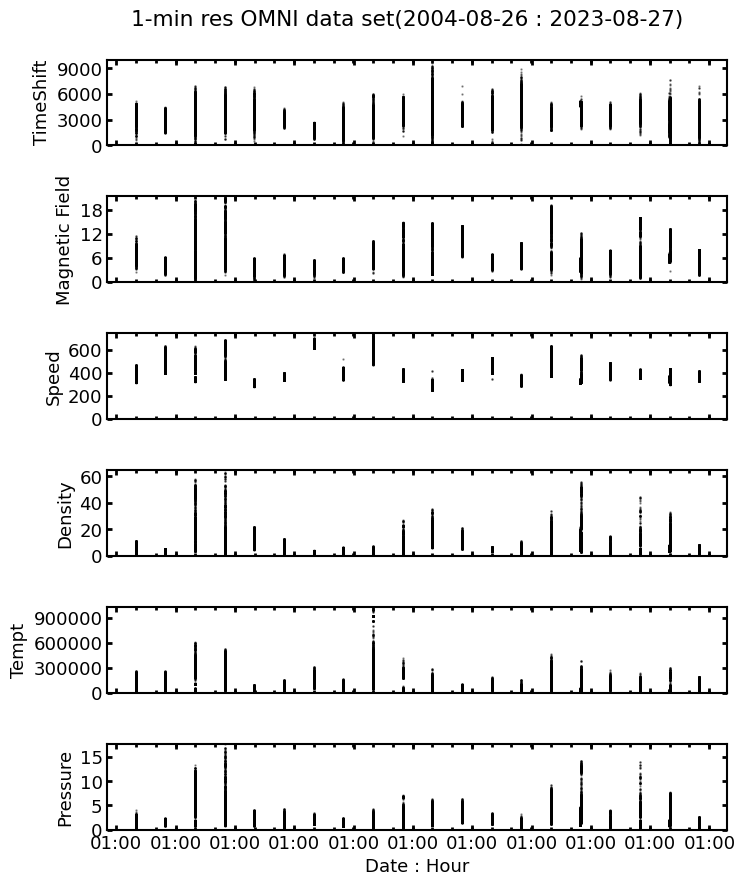

In [11]:
plt.rcParams.update({'font.family':'DejaVu Sans',"figure.facecolor":'white',"font.size":13})

fig,ax = plt.subplots(len(headers),1,figsize=(8,12),sharex = True)
fig.suptitle("1-min res OMNI data set(2004-08-26 : 2023-08-27)",y = 0.93)

fig.set_figheight(10)
fig.subplots_adjust(hspace=0.6)
#for formatting the x labels to take day and hour
myFmt = mdates.DateFormatter('%d:%H')

for i,item in enumerate(headers):
    [x.set_linewidth(1.5) for x in ax[i].spines.values()]
#     ax[i].plot(solar_data[time_date"],solar_data[item])
    ax[i].scatter(solar_data["time_date"],solar_data[item],s = 0.5, alpha = 0.4,color = 'black')
    
    #setting y limit to equals 0 to max value and label of it to equal the argument passed from graph_header
    ax[i].set_ylim([0,solar_data[item].max()])
    ax[i].set_ylabel(f"{graph_header[i]}")
    
    #setting the y axis 4 major locator to have ticks in the pos and 3 minor locator
    ax[i].yaxis.set_major_locator(plt.MaxNLocator(4))
    ax[i].xaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    ax[i].tick_params(left = True, right = True, bottom = True, top = True, direction = "in",which = "both",width = 2)
    
    if (item == headers[-1]):
        #to have labels in x-axis in format %d-%H
        ax[i].xaxis.set_major_formatter(myFmt)
        ax[i].set_xlabel("Date : Hour")
        
# directory to save the images
save_dir = 'pictures/'

# Save the figure with a specific filename and path
plt.savefig(os.path.join(save_dir, 'final.jpg'), bbox_inches='tight')